# STAR WARS SURVEY


data by FiveThirtyEight from their GitHub repository: https://github.com/fivethirtyeight/data/tree/master/star-wars-survey
        

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Selected columns' descriptions from the data:
- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

---------------
Removing rows where 'RespondentID' is NaN

In [6]:
star_wars['RespondentID'].isnull().sum()

1

In [7]:
star_wars = star_wars[star_wars['RespondentID'].notnull()].copy()

In [8]:
star_wars['RespondentID'].isnull().sum()

0

----------------
Cleaning and Mapping Yes/No Columns
--------------

Yes/No columns: 
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

In [9]:
cols_yn = ['Have you seen any of the 6 films in the Star Wars franchise?' \
        , 'Do you consider yourself to be a fan of the Star Wars film franchise?']

for c in cols_yn:
    print(star_wars[c].value_counts(dropna=False))
    print('\n')
    

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64




converting these columns to Boolean type:

In [10]:
yes_no = {
    "Yes": True,
    "No": False
}

In [11]:
for c in cols_yn:
    star_wars[c] = star_wars[c].map(yes_no)

In [12]:
for c in cols_yn:
    print(star_wars[c].value_counts(dropna=False))
    print('\n')

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64




---------
Cleaning and Mapping Checkbox Columns
-----------------

In [13]:
cols_cb = star_wars.columns[3:9]

In [14]:
for c in cols_cb:
    print(star_wars[c].value_counts(dropna=False))
    print('\n')

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64




converting these columns to Boolean type:

In [15]:
map_cb_name = ['Star Wars: Episode I  The Phantom Menace' \
              , 'Star Wars: Episode II  Attack of the Clones' \
              , 'Star Wars: Episode III  Revenge of the Sith' \
              , 'Star Wars: Episode IV  A New Hope' \
              , 'Star Wars: Episode V The Empire Strikes Back' \
              , 'Star Wars: Episode VI Return of the Jedi']

In [16]:
import numpy as np

i = 0
for c in cols_cb:
    map_cb = {
    map_cb_name[i]: True,
    np.NaN: False
    }
    star_wars[c] = star_wars[c].map(map_cb)
    print(star_wars[c].value_counts(dropna=False))
    print('\n')
    i += 1
    

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




--------------
Renaming the columns:

In [17]:
i = 1
for c in cols_cb:
    star_wars = star_wars.rename(columns={c: "seen_{}".format(i)})
    i += 1

In [18]:
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


-------------
Cleaning the Rankng Columns
-----------

Converting the ranking columns ([9:15]) to float type:

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]] \
.astype(float)

Renaming the columns:

In [20]:
i = 1
for c in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns={c: "ranking_{}".format(i)})
    i += 1
    
print(star_wars.columns[9:15])    

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


----------
Finding the Highest-Ranked Movie
----------

Computing the mean of each of the ranking columns:

In [21]:
ranking = star_wars.iloc[:,9:15].mean()

mapper_index_rank = {}
i=0
for c in star_wars.columns[9:15]:
    mapper_index_rank[c] = map_cb_name[i]
    i += 1
print(mapper_index_rank)  
ranking.rename(mapper_index_rank, inplace=True)
ranking

{'ranking_5': 'Star Wars: Episode V The Empire Strikes Back', 'ranking_6': 'Star Wars: Episode VI Return of the Jedi', 'ranking_2': 'Star Wars: Episode II  Attack of the Clones', 'ranking_3': 'Star Wars: Episode III  Revenge of the Sith', 'ranking_1': 'Star Wars: Episode I  The Phantom Menace', 'ranking_4': 'Star Wars: Episode IV  A New Hope'}


Star Wars: Episode I  The Phantom Menace        3.732934
Star Wars: Episode II  Attack of the Clones     4.087321
Star Wars: Episode III  Revenge of the Sith     4.341317
Star Wars: Episode IV  A New Hope               3.272727
Star Wars: Episode V The Empire Strikes Back    2.513158
Star Wars: Episode VI Return of the Jedi        3.047847
dtype: float64

In [22]:
import matplotlib.pyplot as plt

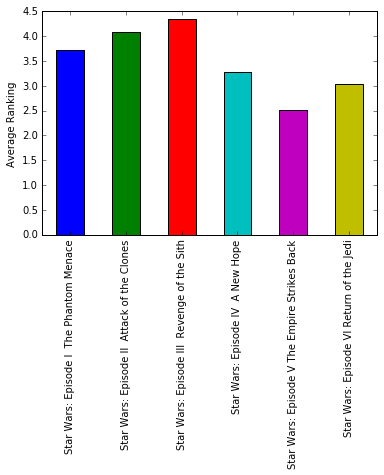

In [23]:
%matplotlib inline
ax = ranking.plot.bar()
ax.set_ylabel('Average Ranking')

The best ranking (lowest ranking) is for "Star Wars: Episode V The Empire Strikes Back"  and the worst ranking is for "Star Wars: Episode III Attack of the Clones"

----------
Finding the Most Viewed Movie
----------

In [24]:
viewed = star_wars.iloc[:,3:9].sum()
mapper_index_seen = {}
i=0
for c in star_wars.columns[3:9]:
    mapper_index_seen[c] = map_cb_name[i]
    i += 1
print(mapper_index_seen) 
viewed.rename(mapper_index_seen, inplace=True)
viewed

{'seen_1': 'Star Wars: Episode I  The Phantom Menace', 'seen_6': 'Star Wars: Episode VI Return of the Jedi', 'seen_4': 'Star Wars: Episode IV  A New Hope', 'seen_3': 'Star Wars: Episode III  Revenge of the Sith', 'seen_5': 'Star Wars: Episode V The Empire Strikes Back', 'seen_2': 'Star Wars: Episode II  Attack of the Clones'}


Star Wars: Episode I  The Phantom Menace        673
Star Wars: Episode II  Attack of the Clones     571
Star Wars: Episode III  Revenge of the Sith     550
Star Wars: Episode IV  A New Hope               607
Star Wars: Episode V The Empire Strikes Back    758
Star Wars: Episode VI Return of the Jedi        738
dtype: int64

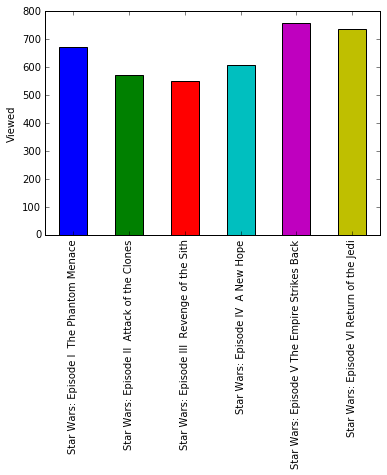

In [25]:
ax = viewed.plot.bar()
ax.set_ylabel('Viewed')

The most viewed is "Star Wars: Episode V The Empire Strikes Back"  and the least viewed is "Star Wars: Episode III Attack of the Clones"

------ 
Merging Ranking and Viewed results

In [26]:
combined = pd.concat([ranking, viewed], axis=1, keys=['ranking', 'viewed'])
combined

,ranking,viewed
Star Wars: Episode I The Phantom Menace,3.732934,673
Star Wars: Episode II Attack of the Clones,4.087321,571
Star Wars: Episode III Revenge of the Sith,4.341317,550
Star Wars: Episode IV A New Hope,3.272727,607
Star Wars: Episode V The Empire Strikes Back,2.513158,758
Star Wars: Episode VI Return of the Jedi,3.047847,738


In [27]:
combined.corr()

,ranking,viewed
ranking,1.000000,-0.878126
viewed,-0.878126,1.000000


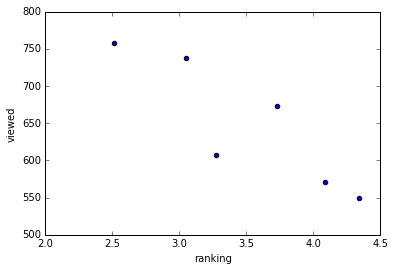

In [28]:
combined.plot.scatter(x='ranking', y='viewed')

There seems to be a strong negative correlation (r=-0.89) between the ranking of a movie and the number of views

-----------
Exploring Segemnts of Survey Population - Male vs Female
------------

Ranking - Male vs female:

In [29]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
print(males.shape[0])
print(females.shape[0])

497
549


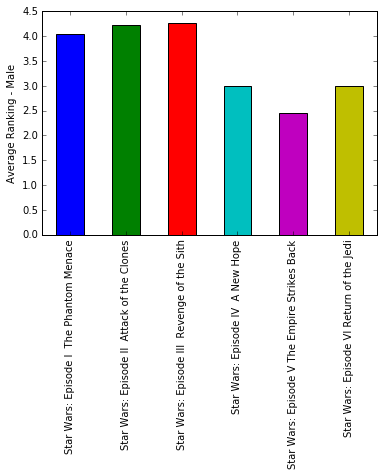

In [30]:
ranking_male = males.iloc[:,9:15].mean()
ranking_male.rename(mapper_index_rank, inplace=True)

ax = ranking_male.plot.bar()
ax.set_ylabel('Average Ranking - Male')

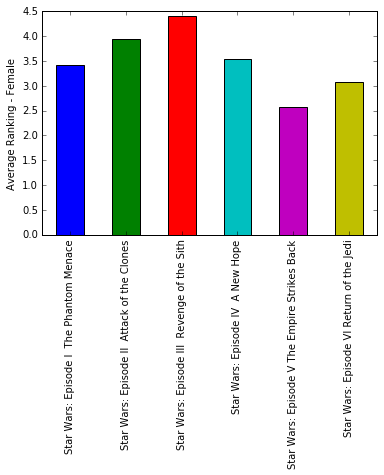

In [31]:
ranking_female = females.iloc[:,9:15].mean()
ranking_female.rename(mapper_index_rank, inplace=True)

ax = ranking_female.plot.bar()
ax.set_ylabel('Average Ranking - Female')

In [32]:
combined_rank_fm = pd.concat([ranking_male, ranking_female], axis=1 \
                        , keys=['male', 'female'])
combined_rank_fm

,male,female
Star Wars: Episode I The Phantom Menace,4.037825,3.429293
Star Wars: Episode II Attack of the Clones,4.224586,3.954660
Star Wars: Episode III Revenge of the Sith,4.274882,4.418136
Star Wars: Episode IV A New Hope,2.997636,3.544081
Star Wars: Episode V The Empire Strikes Back,2.458629,2.569270
Star Wars: Episode VI Return of the Jedi,3.002364,3.078086


In [33]:
combined_rank_fm['diff'] = combined_rank_fm['male']-combined_rank_fm['female']
combined_rank_fm

,male,female,diff
Star Wars: Episode I The Phantom Menace,4.037825,3.429293,0.608532
Star Wars: Episode II Attack of the Clones,4.224586,3.954660,0.269926
Star Wars: Episode III Revenge of the Sith,4.274882,4.418136,-0.143255
Star Wars: Episode IV A New Hope,2.997636,3.544081,-0.546445
Star Wars: Episode V The Empire Strikes Back,2.458629,2.569270,-0.110641
Star Wars: Episode VI Return of the Jedi,3.002364,3.078086,-0.075722


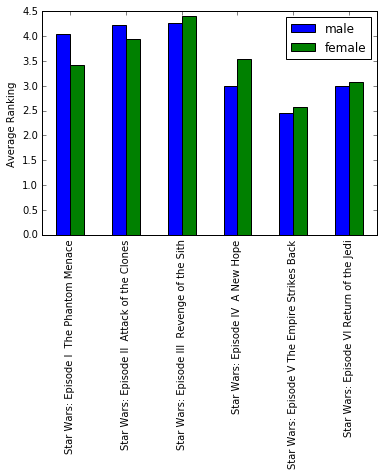

In [34]:
ax = combined_rank_fm[['male','female']].plot.bar()
ax.set_ylabel('Average Ranking')

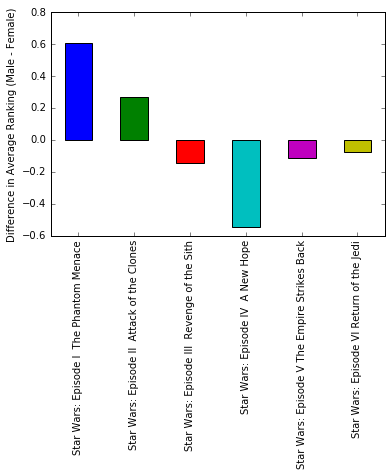

In [35]:
ax = combined_rank_fm['diff'].plot.bar()
ax.set_ylabel('Difference in Average Ranking (Male - Female)')

While for 'Episode I' the ranking of males is higher (higher ranking is worse!) than females for 'Episode IV' the opposite is true

Viewed - Male vs female:
as the numbers of femalea and males are different we claculate the percentage of viewed

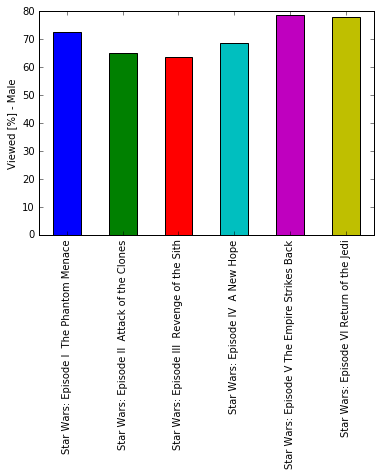

In [36]:
viewed_male = males.iloc[:,3:9].sum()/males.shape[0]*100
viewed_male.rename(mapper_index_seen, inplace=True)

ax = viewed_male.plot.bar()
ax.set_ylabel('Viewed [%] - Male')

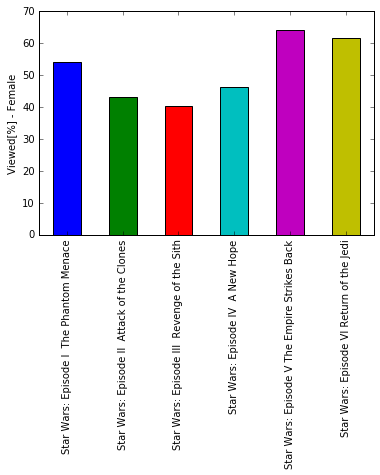

In [37]:
viewed_female = females.iloc[:,3:9].sum()/females.shape[0]*100
viewed_female.rename(mapper_index_seen, inplace=True)

ax = viewed_female.plot.bar()
ax.set_ylabel('Viewed[%] - Female')

In [38]:
combined_viewed_fm = pd.concat([viewed_male, viewed_female], axis=1 \
                        , keys=['male', 'female'])
combined_viewed_fm

,male,female
Star Wars: Episode I The Phantom Menace,72.635815,54.280510
Star Wars: Episode II Attack of the Clones,64.989940,43.169399
Star Wars: Episode III Revenge of the Sith,63.782696,40.437158
Star Wars: Episode IV A New Hope,68.812877,46.448087
Star Wars: Episode V The Empire Strikes Back,78.873239,64.298725
Star Wars: Episode VI Return of the Jedi,77.867203,61.566485


In [39]:
combined_viewed_fm['diff'] = combined_viewed_fm['male']-combined_viewed_fm['female']
combined_viewed_fm

,male,female,diff
Star Wars: Episode I The Phantom Menace,72.635815,54.280510,18.355305
Star Wars: Episode II Attack of the Clones,64.989940,43.169399,21.820541
Star Wars: Episode III Revenge of the Sith,63.782696,40.437158,23.345538
Star Wars: Episode IV A New Hope,68.812877,46.448087,22.364790
Star Wars: Episode V The Empire Strikes Back,78.873239,64.298725,14.574514
Star Wars: Episode VI Return of the Jedi,77.867203,61.566485,16.300719


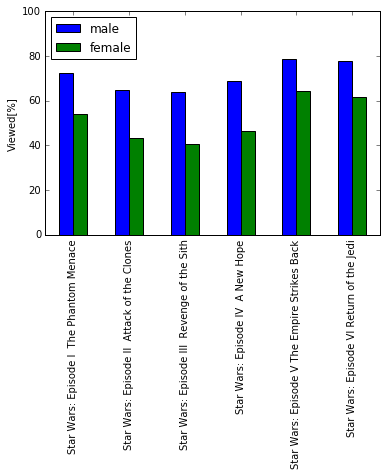

In [40]:
ax = combined_viewed_fm[['male','female']].plot.bar()
ax.set_ylim(0,100)
ax.set_ylabel('Viewed[%]')

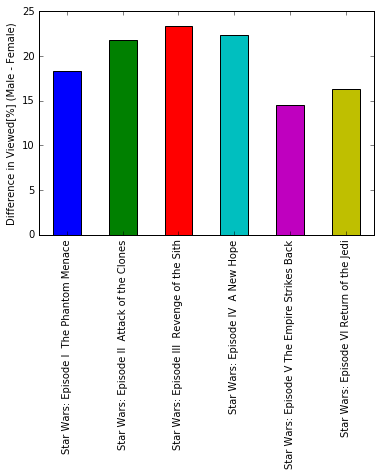

In [41]:
ax = combined_viewed_fm['diff'].plot.bar()
ax.set_ylabel('Difference in Viewed[%] (Male - Female)')

For all the Epsisodes the percentage of views by males are higher than the ones of females - the lowest difference is for last two Epsisodes!

Note that the nmber of females in the survey is higher thane males: 497 male vs 549 females

-----------
Exploring Segemnts of Survey Population - Fans vs Non-fans
------------

Ranking - Fans vs Non-fans:

In [42]:
col_name = 'Do you consider yourself to be a fan of the Star Wars film franchise?' 
fans = star_wars[star_wars[col_name] == True]
nonfans = star_wars[star_wars[col_name] == False]
print(fans.shape[0])
print(nonfans.shape[0])

552
284


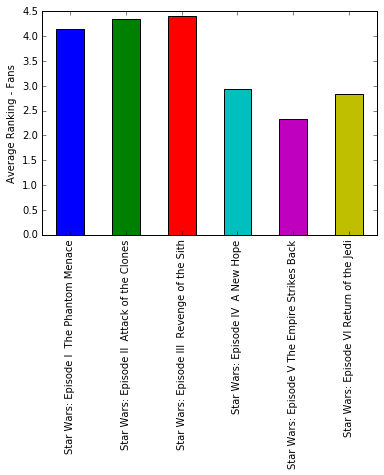

In [43]:
ranking_fans = fans.iloc[:,9:15].mean()
ranking_fans.rename(mapper_index_rank, inplace=True)

ax = ranking_fans.plot.bar()
ax.set_ylabel('Average Ranking - Fans')

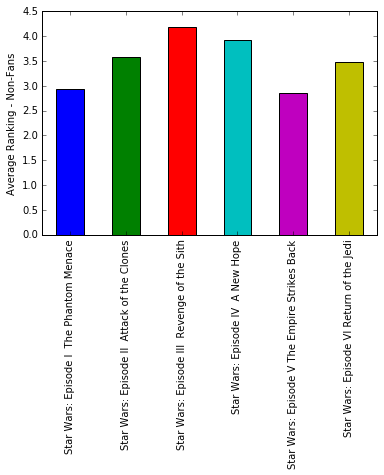

In [44]:
ranking_nonfans = nonfans.iloc[:,9:15].mean()
ranking_nonfans.rename(mapper_index_rank, inplace=True)

ax = ranking_nonfans.plot.bar()
ax.set_ylabel('Average Ranking - Non-Fans')

In [45]:
combined_rank_fn = pd.concat([ranking_fans, ranking_nonfans], axis=1 \
                        , keys=['fans', 'nonfans'])
combined_rank_fn

,fans,nonfans
Star Wars: Episode I The Phantom Menace,4.141304,2.936396
Star Wars: Episode II Attack of the Clones,4.342391,3.591549
Star Wars: Episode III Revenge of the Sith,4.417423,4.193662
Star Wars: Episode IV A New Hope,2.932971,3.933099
Star Wars: Episode V The Empire Strikes Back,2.333333,2.862676
Star Wars: Episode VI Return of the Jedi,2.829710,3.471831


In [46]:
combined_rank_fn['diff'] = combined_rank_fn['fans']-combined_rank_fn['nonfans']
combined_rank_fn

,fans,nonfans,diff
Star Wars: Episode I The Phantom Menace,4.141304,2.936396,1.204909
Star Wars: Episode II Attack of the Clones,4.342391,3.591549,0.750842
Star Wars: Episode III Revenge of the Sith,4.417423,4.193662,0.223761
Star Wars: Episode IV A New Hope,2.932971,3.933099,-1.000128
Star Wars: Episode V The Empire Strikes Back,2.333333,2.862676,-0.529343
Star Wars: Episode VI Return of the Jedi,2.829710,3.471831,-0.642121


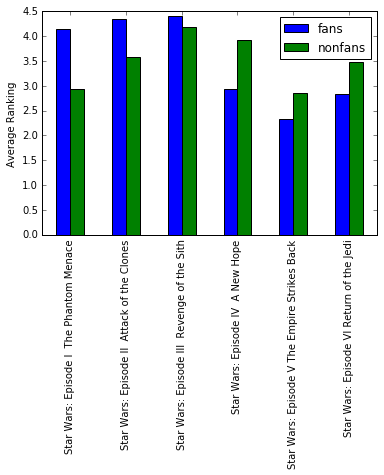

In [47]:
ax = combined_rank_fn[['fans','nonfans']].plot.bar()
ax.set_ylabel('Average Ranking')

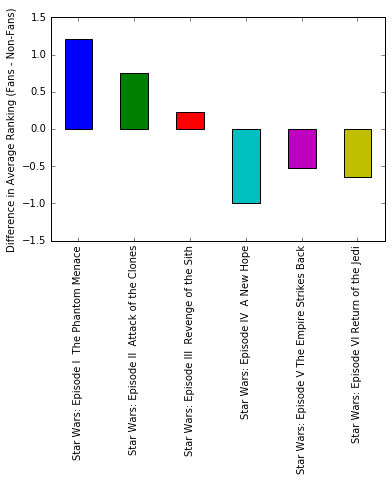

In [48]:
ax = combined_rank_fn['diff'].plot.bar()
ax.set_ylabel('Difference in Average Ranking (Fans - Non-Fans)')

While for 3 first Epsisodes the ranking of fans is higher than non-fans (higher ranking is worst!) for the alst  3 espisodes the opposite is true

Viewed - fans vs non-fans: as the numbers of fans and non-fans are different we claculate the percentage of viewed

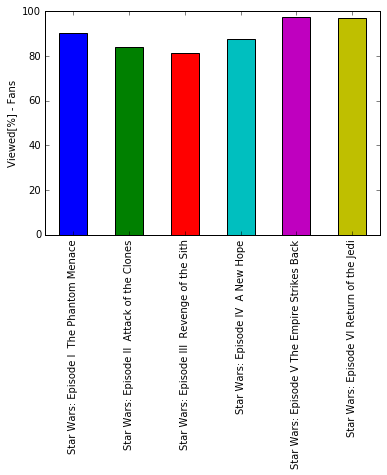

In [49]:
viewed_fans = fans.iloc[:,3:9].sum()/fans.shape[0]*100
viewed_fans.rename(mapper_index_seen, inplace=True)

ax = viewed_fans.plot.bar()
ax.set_ylabel('Viewed[%] - Fans')

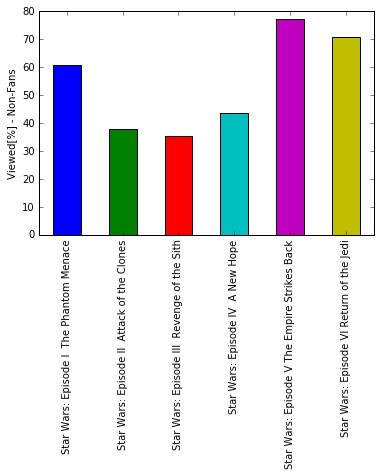

In [50]:
viewed_nonfans = nonfans.iloc[:,3:9].sum()/nonfans.shape[0]*100
viewed_nonfans.rename(mapper_index_seen, inplace=True)

ax = viewed_nonfans.plot.bar()
ax.set_ylabel('Viewed[%] - Non-Fans')

In [51]:
combined_viewed_fn = pd.concat([viewed_fans, viewed_nonfans], axis=1 \
                        , keys=['fans', 'nonfans'])
combined_viewed_fn

,fans,nonfans
Star Wars: Episode I The Phantom Menace,90.579710,60.915493
Star Wars: Episode II Attack of the Clones,83.876812,38.028169
Star Wars: Episode III Revenge of the Sith,81.521739,35.211268
Star Wars: Episode IV A New Hope,87.500000,43.661972
Star Wars: Episode V The Empire Strikes Back,97.463768,77.464789
Star Wars: Episode VI Return of the Jedi,97.282609,70.774648


In [52]:
combined_viewed_fn['diff'] = combined_viewed_fn['fans']-combined_viewed_fn['nonfans']
combined_viewed_fn

,fans,nonfans,diff
Star Wars: Episode I The Phantom Menace,90.579710,60.915493,29.664217
Star Wars: Episode II Attack of the Clones,83.876812,38.028169,45.848643
Star Wars: Episode III Revenge of the Sith,81.521739,35.211268,46.310472
Star Wars: Episode IV A New Hope,87.500000,43.661972,43.838028
Star Wars: Episode V The Empire Strikes Back,97.463768,77.464789,19.998979
Star Wars: Episode VI Return of the Jedi,97.282609,70.774648,26.507961


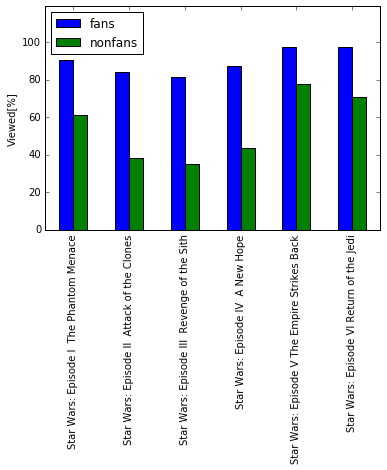

In [53]:
ax = combined_viewed_fn[['fans','nonfans']].plot.bar()
ax.set_ylim(0,119)
ax.set_ylabel('Viewed[%]')

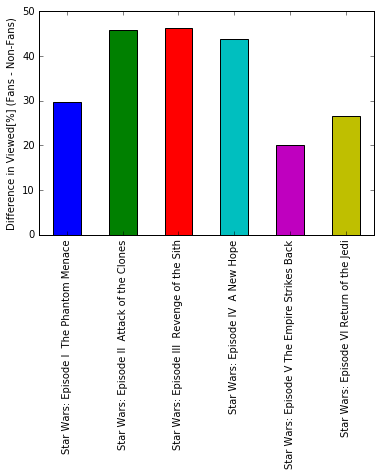

In [54]:
ax = combined_viewed_fn['diff'].plot.bar()
ax.set_ylabel('Difference in Viewed[%] (Fans - Non-Fans)')

For all the Epsisodes the percentage of views by fans are higher than the ones of non-fans - the lowest difference is for Episode V!

------
Exploring Segemnts of Survey Population - Eduacation
---------

In [55]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [56]:
star_wars['Education'].fillna('Others/non-specified', inplace=True)

In [57]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
Others/non-specified                150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

Ranking:

In [58]:
cols_rank = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4'\
             ,'ranking_5','ranking_6']
Edu_rank = star_wars.groupby(['Education']).mean()[cols_rank]

In [59]:
Edu_rank = Edu_rank.T
Edu_rank.rename(mapper_index_rank, inplace=True)

In [60]:
Edu_rank

Education,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Others/non-specified,Some college or Associate degree
Star Wars: Episode I The Phantom Menace,3.828244,3.822222,3.802817,5.000000,3.35,3.551181
Star Wars: Episode II Attack of the Clones,4.290076,4.225664,3.746479,5.333333,3.45,3.885827
Star Wars: Episode III Revenge of the Sith,4.521073,4.500000,4.126761,3.666667,4.10,4.102362
Star Wars: Episode IV A New Hope,3.114504,3.199115,3.211268,2.666667,3.55,3.503937
Star Wars: Episode V The Empire Strikes Back,2.309160,2.323009,2.873239,1.000000,2.85,2.783465
Star Wars: Episode VI Return of the Jedi,2.931298,2.920354,3.239437,3.333333,3.70,3.173228


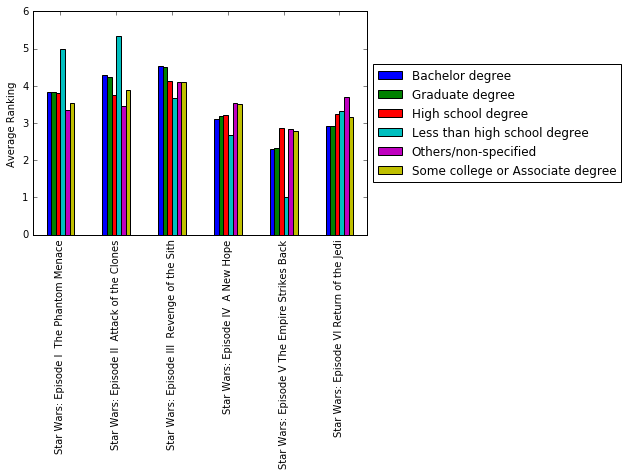

In [95]:
ax = Edu_rank.plot.bar()
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Average Ranking')

Only major difference seems to be between people with less than high scholl degree and others for the following movies: 
- Episode I and II: higher than others
- Episode V: less than others

Viewed: as the number of entries in each category of education is different we calculate the percentage

In [85]:
cols_viewed = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5'\
             , 'seen_6']
Edu_viewed_sum = star_wars.groupby(['Education']).sum()[cols_viewed]
Edu_viewed_count = star_wars.groupby(['Education']).count()[cols_viewed]

In [86]:
Edu_viewed = Edu_viewed_sum / Edu_viewed_count * 100

In [101]:
Edu_viewed = Edu_viewed.T
Edu_viewed.rename(mapper_index_seen, inplace=True)

In [102]:
Edu_viewed

,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
Education,,,,,,
Bachelor degree,64.174455,52.959502,50.778816,60.747664,75.700935,72.897196
Graduate degree,65.090909,54.181818,50.545455,59.272727,75.272727,73.090909
High school degree,54.285714,45.714286,45.714286,50.476190,58.095238,57.142857
Less than high school degree,42.857143,42.857143,42.857143,42.857143,42.857143,42.857143
Others/non-specified,11.333333,10.000000,9.333333,8.666667,11.333333,11.333333
Some college or Associate degree,64.329268,56.707317,55.792683,54.878049,69.207317,67.987805


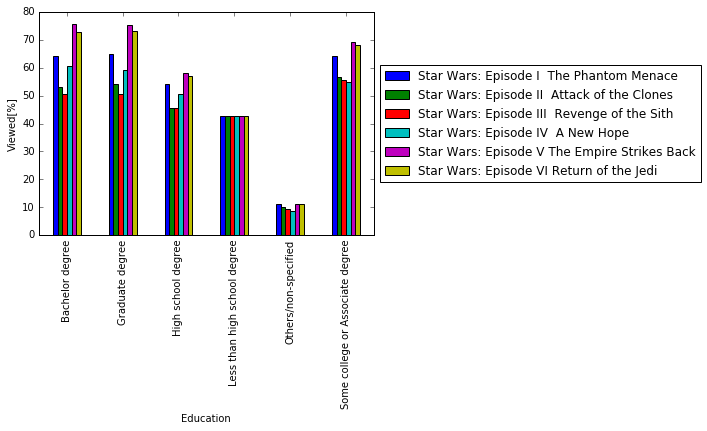

In [103]:
ax = Edu_viewed.plot.bar()
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Viewed[%]')

If we don't concider the categorey "Others/non-specified":
- people with lower education, i.e., "High scholl degree" and "Less than high school degree" have consistently lower percentgae of views for all Episodes 

However, note that the "lower-eduction" categories have less entries in the data, e.g., only 7 entries for "Less than high school degree", so the number of samples might not be representative!